# AI I Can't Believe It's Not Butter

### Credit Card Dataset
Segmentation is the process of dividing customers into groups based on their shared characteristics, such as interests, needs, or location. It is a useful marketing technique as it allows a company to precisely identify the consumer with a specific need and want. Companies can use customer information to tailor and allocate resources to the products demanded the most by the customer.

### Objective
Develop a customer segmentation approach as a means of a marketing strategy.

### Problem Statement
<b>"How does a company segement its customers to address a specific consumer need?"</b>

Let's elaborate the problem a little further. A budget app company has provided us with data about its customers such as, customer's credit card balance, the number of purchases, and how frequently purchases were made etc. We could use this dataset information to identify how the company targets customers to increase their engaged users with tailored information/guidance on user's needs/goals.

### Approach
1. Read the dataset
2. Explore the data: Identify variables, datatypes, missing values, outliers
3. Data Cleaning and Preprocessing
4. Extract Features
5. Clustering
6. Model Building
7. Evaluation

In [6]:
# Import Libraries
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
import nltk
from dateutil.parser import parse

import warnings
warnings.filterwarnings(action="ignore") 

from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation, estimate_bandwidth, KMeans, MeanShift, SpectralClustering

# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [16]:
# Loading data from csv file
data = pd.read_csv("Data/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## The Dataset

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata). This summarizes the 18 behavioral variables of the credit card customers. The features of the dataset are as follows:

- `CUST_ID`: Identification of Credit Card holder (Categorical)
- `BALANCE`: Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY`: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES`: Amount of purchases made from account
- `ONEOFF_PURCHASES`: Maximum purchase amount done in one-go
- `INSTALLMENTS_PURCHASES`: Amount of purchase done in installment
- `CASH_ADVANCE`: Cash in advance given by the user
- `PURCHASES_FREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASESINSTALLMENTSFREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASHADVANCEFREQUENCY`: How frequently the cash in advance being paid
- `CASHADVANCETRX`: Number of Transactions made with "Cash in Advanced"
- `PURCHASES_TRX`: Number of purchase transactions made
- `CREDIT_LIMIT`: Limit of Credit Card for user
- `PAYMENTS`: Amount of Payment done by user
- `MINIMUM_PAYMENTS`: Minimum amount of payments made by user
- `PRCFULLPAYMENT`: Percent of full payment paid by user
- `TENURE`: Tenure of credit card service for user

Let's now discover the contents of the data:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [19]:
# What are the unique values is each field?
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [20]:
# What are the missing values and outliers stemmed during data collection?
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
MINIMUM_PAYMENTS,313,0.034972
CREDIT_LIMIT,1,0.000112
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


`MINIMUM_PAYMENTS` and `CREDIT_LIMIT` fields have a significant number of missing values.

Now let's detect the outliers in our dataset. Outliers are extreme values that are outside the range of what is expected and unlike the other data. Outliers contribute noise to our data.

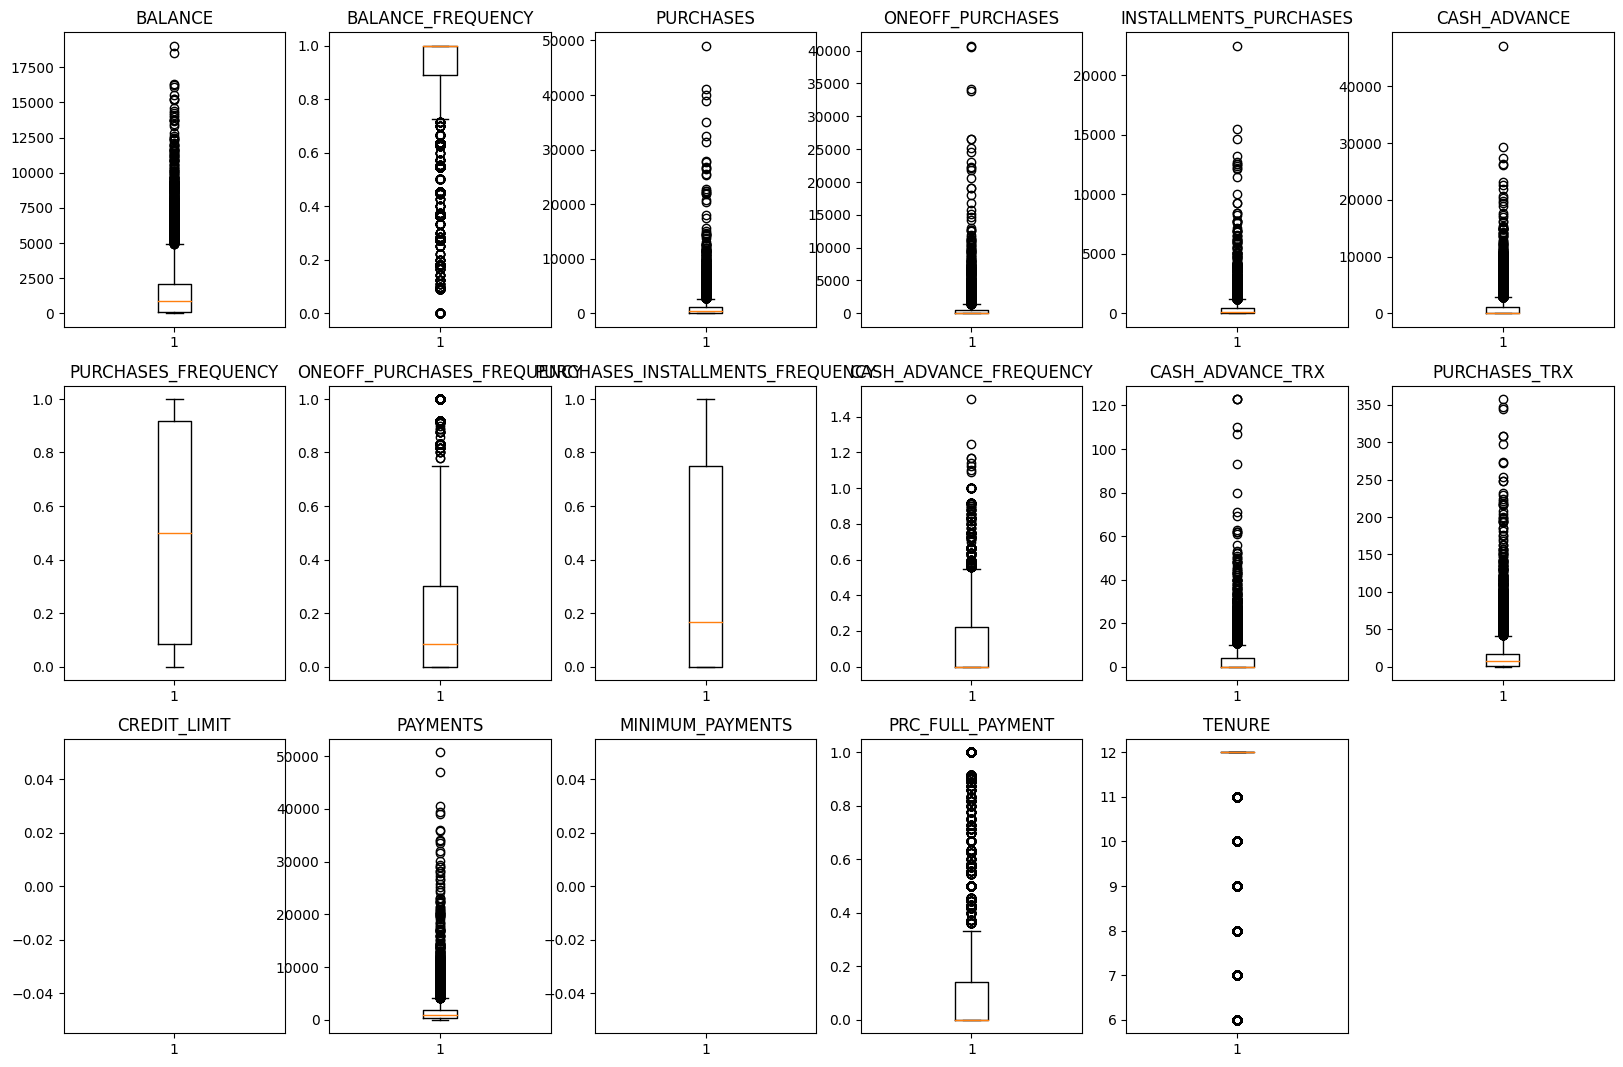

In [21]:
# Using the box plot to detect outliers.

plt.figure(figsize = (20, 13))

plt.subplot(3,6,1)
plt.boxplot(data["BALANCE"])
plt.title("BALANCE")

plt.subplot(3,6,2)
plt.boxplot(data["BALANCE_FREQUENCY"])
plt.title("BALANCE_FREQUENCY")

plt.subplot(3,6,3)
plt.boxplot(data["PURCHASES"])
plt.title("PURCHASES")

plt.subplot(3,6,4)
plt.boxplot(data["ONEOFF_PURCHASES"])
plt.title("ONEOFF_PURCHASES")

plt.subplot(3,6,5)
plt.boxplot(data["INSTALLMENTS_PURCHASES"])
plt.title("INSTALLMENTS_PURCHASES")

plt.subplot(3,6,6)
plt.boxplot(data["CASH_ADVANCE"])
plt.title("CASH_ADVANCE")

plt.subplot(3,6,7)
plt.boxplot(data["PURCHASES_FREQUENCY"])
plt.title("PURCHASES_FREQUENCY")

plt.subplot(3,6,8)
plt.boxplot(data["ONEOFF_PURCHASES_FREQUENCY"])
plt.title("ONEOFF_PURCHASES_FREQUENCY")

plt.subplot(3,6,9)
plt.boxplot(data["PURCHASES_INSTALLMENTS_FREQUENCY"])
plt.title("PURCHASES_INSTALLMENTS_FREQUENCY")

plt.subplot(3,6,10)
plt.boxplot(data["CASH_ADVANCE_FREQUENCY"])
plt.title("CASH_ADVANCE_FREQUENCY")

plt.subplot(3,6,11)
plt.boxplot(data["CASH_ADVANCE_TRX"])
plt.title("CASH_ADVANCE_TRX")

plt.subplot(3,6,12)
plt.boxplot(data["PURCHASES_TRX"])
plt.title("PURCHASES_TRX")

plt.subplot(3,6,13)
plt.boxplot(data["CREDIT_LIMIT"])
plt.title("CREDIT_LIMIT")

plt.subplot(3,6,14)
plt.boxplot(data["PAYMENTS"])
plt.title("PAYMENTS")

plt.subplot(3,6,15)
plt.boxplot(data["MINIMUM_PAYMENTS"])
plt.title("MINIMUM_PAYMENTS")

plt.subplot(3,6,16)
plt.boxplot(data["PRC_FULL_PAYMENT"])
plt.title("PRC_FULL_PAYMENT")

plt.subplot(3,6,17)
plt.boxplot(data["TENURE"])
plt.title("TENURE")

plt.show()


The box plots above indicate that we have a significant amount of outliers in most of our fields. We will need to eliminate the outliers before we build the models.

## Data Cleaning and Preprocessing

In our initial data exploration phase we discovered that both `MINIMUM_PAYMENTS` and `CREDIT_LIMIT` have missing values. Since these are important fields in the dataset, I will impute the missing values of these attributes with their median. I chose to impute the missing values with its median because this dataset contains a great number of outliers.

I chose to drop the column `CUST_ID` column since it does not add meaningful insights into our findings.

In [22]:
# Filling in Missing Values with the mean
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].median()

# Dropping columns
data = data.drop(columns=['CUST_ID']) 

In [23]:
# Confirming the missing values
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

I chose to use the z-score to limit the values of the outliers. Z-scores are the number of standard deviations above and below the mean that each value falls. I believe that this method would help us detect the outliers and drop the extreme values above and below a certain threshold.

In [24]:
#Using the Z-score to drop outliers
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

data_cleaned = data[(z < 3).all(axis=1)]

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.731989           0.249434   0.424900          0.356934   
1     0.786961           0.134325   0.469552          0.356934   
2     0.447135           0.518084   0.107668          0.108889   
3     0.049099           1.016953   0.232058          0.546189   
4     0.358775           0.518084   0.462063          0.347294   
...        ...                ...        ...               ...   
8945  0.737950           0.518084   0.333293          0.356934   
8946  0.742423           0.518084   0.329136          0.356934   
8947  0.740398           0.185477   0.401965          0.356934   
8948  0.745174           0.185477   0.469552          0.356934   
8949  0.572575           0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349079      0.466786             0.806490   
1                   0.454576      2.605605             1.221758   
2     

In [25]:
# Confirming the shape of the clean data:
data_cleaned.shape

(7434, 17)

I will now use Scikit-Learn's `StandardScaler` method to normalize and standardize the dataset. Standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1. It is required that we standardize the data before we move on to Clustering.

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Standardized values
X= np.asarray(data_cleaned)
scaler = StandardScaler()
X = scaler.fit_transform(X) 

# Converting the numpy array into a pandas DataFrame 
data_scaled = pd.DataFrame(X, columns=data_cleaned.columns)

In [27]:
# Descriptive Statistics
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.564185,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.637483,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.064164,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,-0.341541,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.428562,-0.531523,0.312187


Now that we have scaled our data, let see what variables are correlated toward one another.

#### <b>Correlation Check</b>

<Axes: >

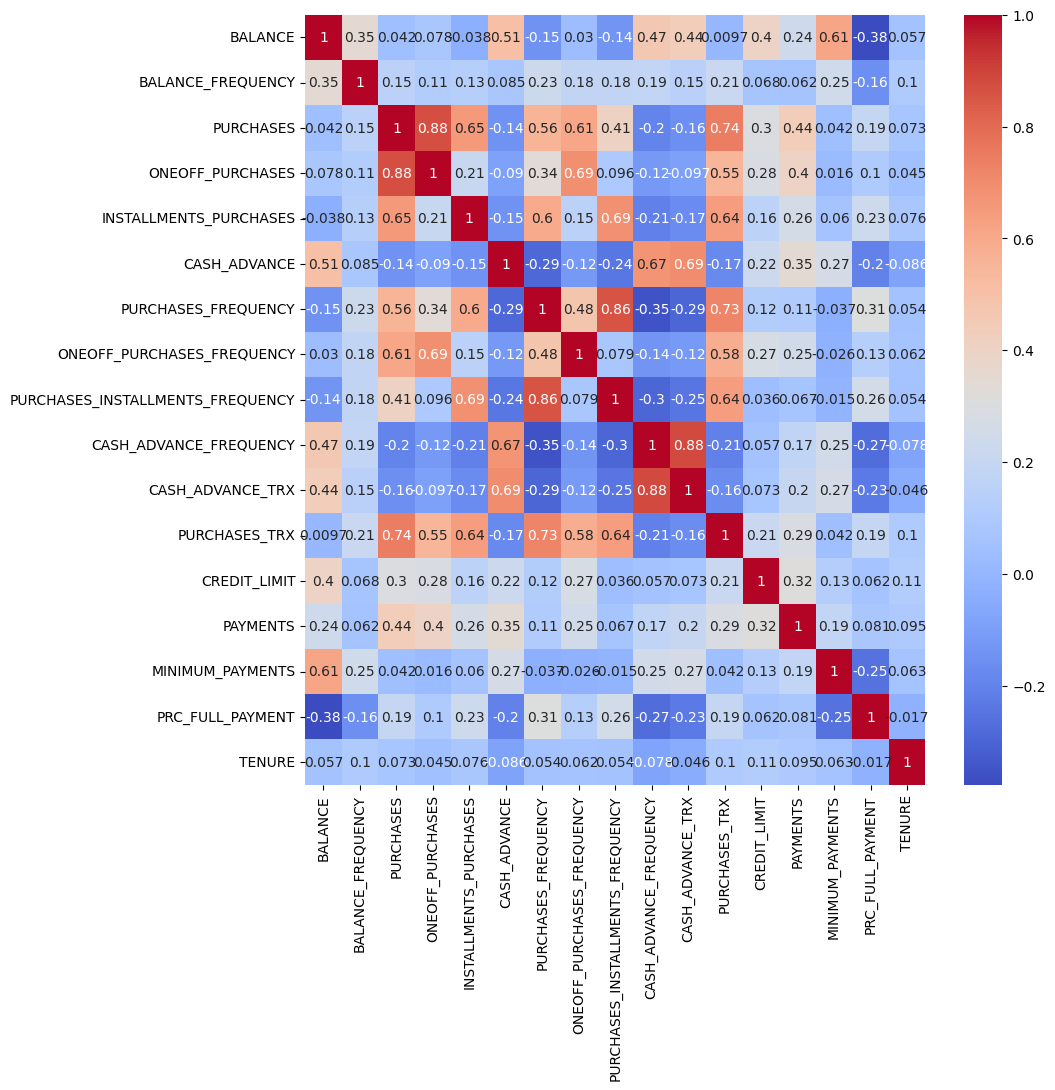

In [28]:
plt.figure(figsize = (10, 10))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_scaled.columns,
            yticklabels=data_scaled.columns)

The heatmap above gives us a clear understanding of the correlation matrices between variables. The highly correlated variables are as follows:

- `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX` (0.88)
- `PURCHASES` and `ONEOFF_PURCHASES` (0.88)
- `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` (0.86)

<Axes: xlabel='PURCHASES', ylabel='Density'>

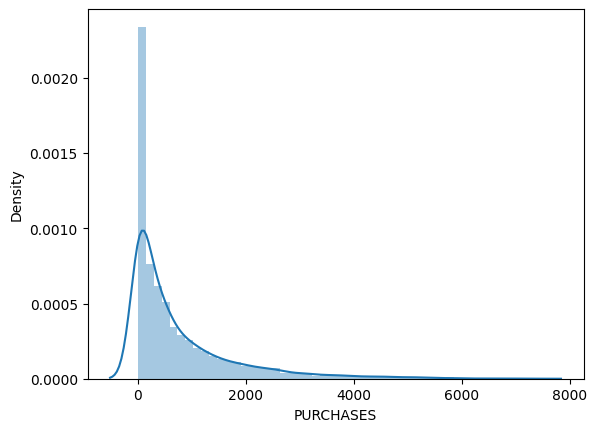

In [29]:
# Check the distribution purchases
sns.distplot(data_cleaned['PURCHASES'])

In [30]:
# What features are highly correlated with Purchases?

corr = data_scaled.corr()

#Correlation with output variable
corr_data = abs(corr["PURCHASES"])
#Selecting highly correlated features
corr_features = corr_data[corr_data > 0.5]
corr_features

PURCHASES                     1.000000
ONEOFF_PURCHASES              0.875720
INSTALLMENTS_PURCHASES        0.652988
PURCHASES_FREQUENCY           0.555402
ONEOFF_PURCHASES_FREQUENCY    0.611340
PURCHASES_TRX                 0.744789
Name: PURCHASES, dtype: float64

More credit card purchases are made on a one-off basis and it appears to be highly correlated with purchases(0.87).

## Clustering

### K-Means Clustering

Clustering is an unsupervised machine learning method where data points are grouped together according to a given “distance metric”.

Since we are dealing with an unsupervised learning problem, I chose to use the Clustering method to generate features for our model. Clustering is a useful method of determining the associations between our data points. The goal of this algorithm is to find K groups in the data.

The K-Means Clustering algorithm works as follows:

- Choose a predetermined number of clusters.
- Find the centroids for each of these clusters, essentially the means.
- Assign each data point to its nearest cluster based on the squared Euclidean distance.
- Create new centroids by taking the mean of all data points assigned to each centroid.
- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the <i>inertia</i>. Inertia is the sum of squared differences between the centroid of a cluster and the data points of that cluster.

Let's now define the clusters and then measure the cluster quality through <i>inertia</i> and <i>silhouette score</i> methods.

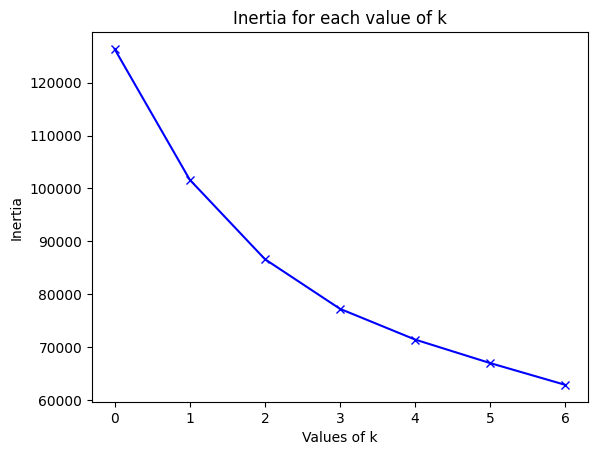

In [32]:
X = data_scaled

n_clusters = 8
inertia = []
k = []
for i in range(1, n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    inertia.append(kmean.inertia_)  
    k.append(i)

plt.plot(inertia, 'bx-')
plt.title('Inertia for each value of k') 
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” meaning, the point after which the distortion/inertia start decreasing in a linear fashion. Thus, with the plot above we can decide that the optimal number of clusters for k is 6.

In [33]:
# Fitting the k to 6 clusters since it has the lowest inertia
kmean= KMeans(6)
kmean.fit(X)
labels = kmean.labels_

In [34]:
clusters = pd.concat([data_cleaned, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,5.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,5.0


Let us now visualize the features of our clusters:

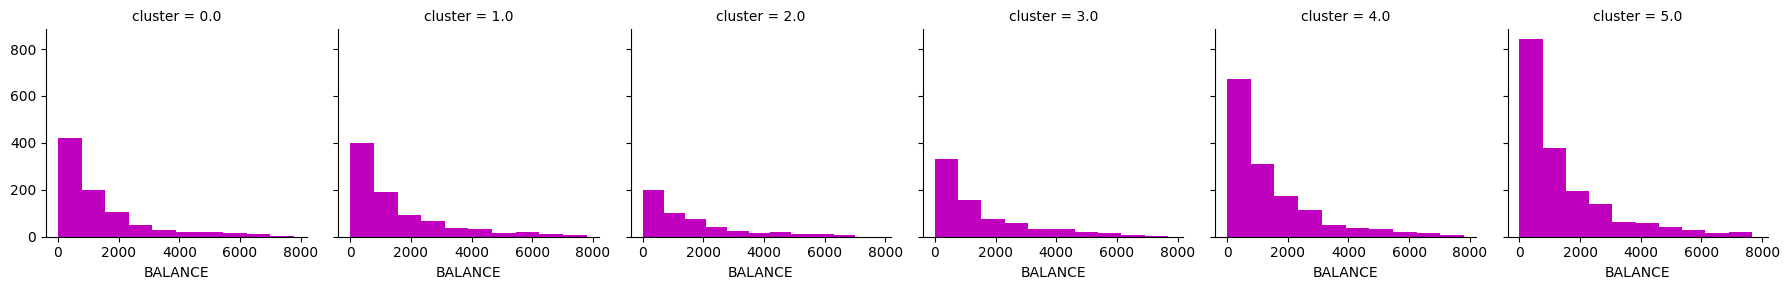

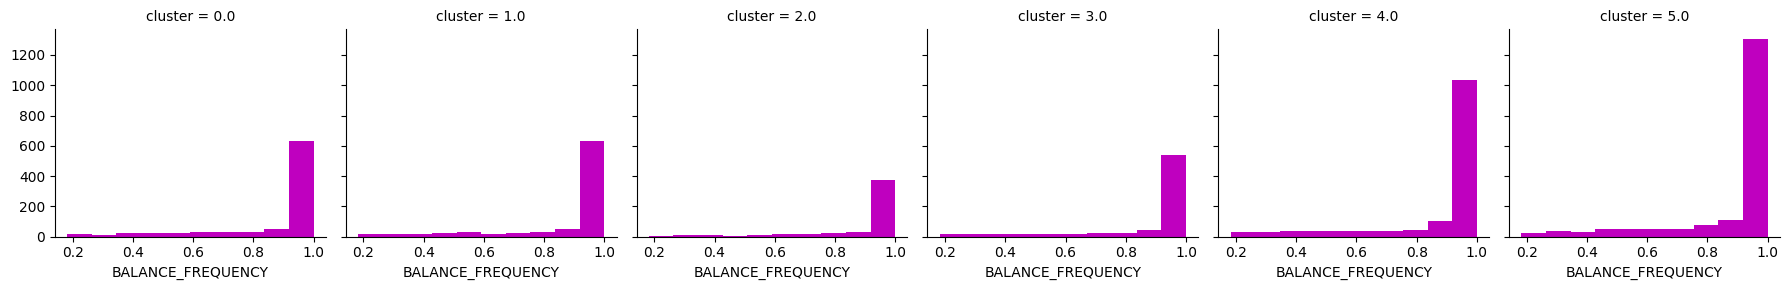

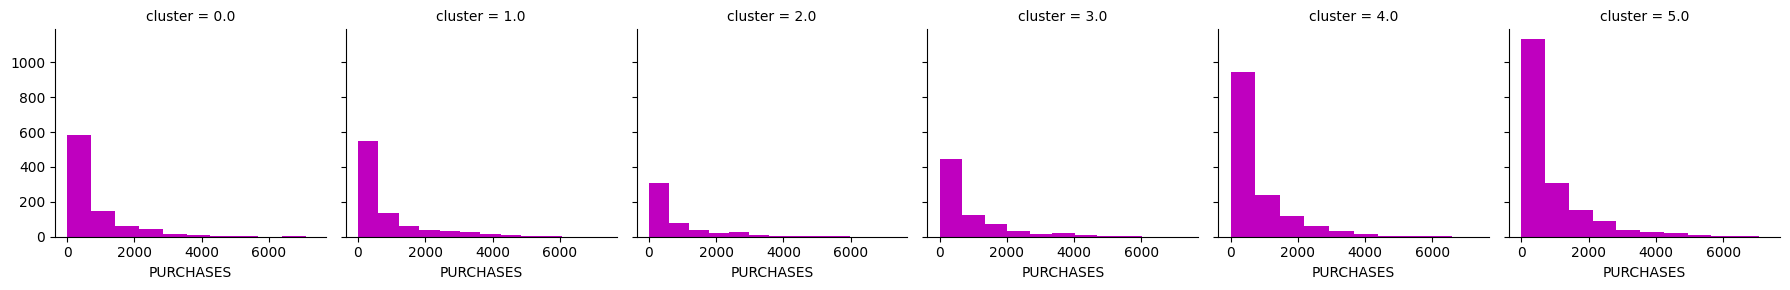

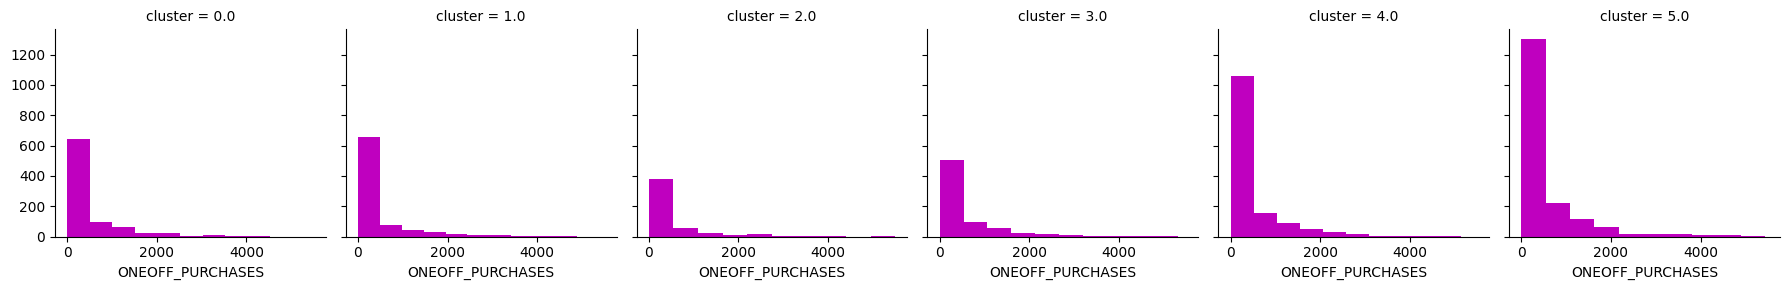

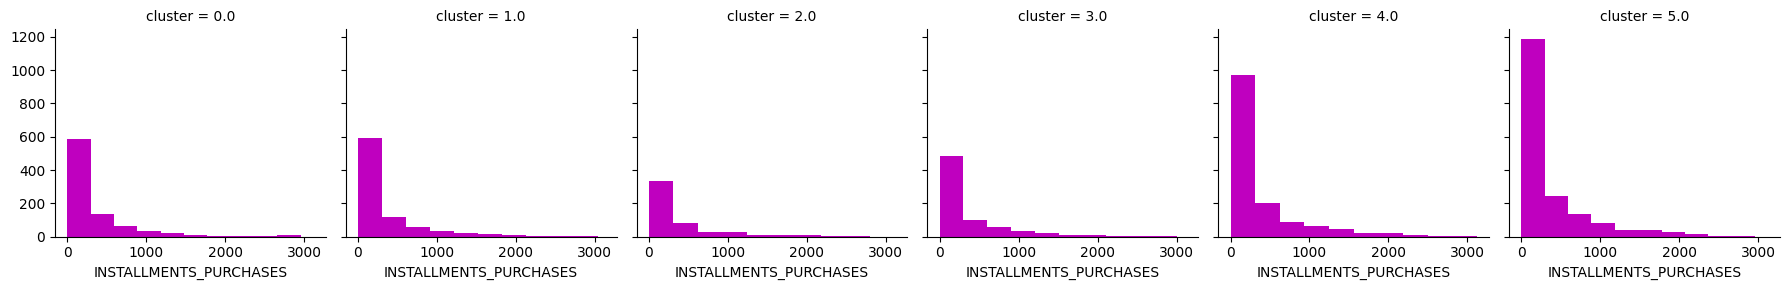

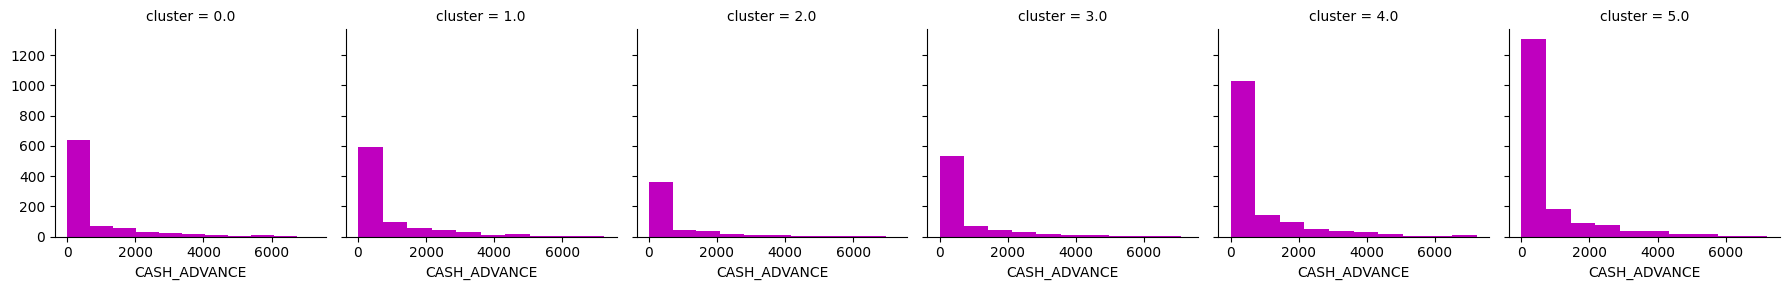

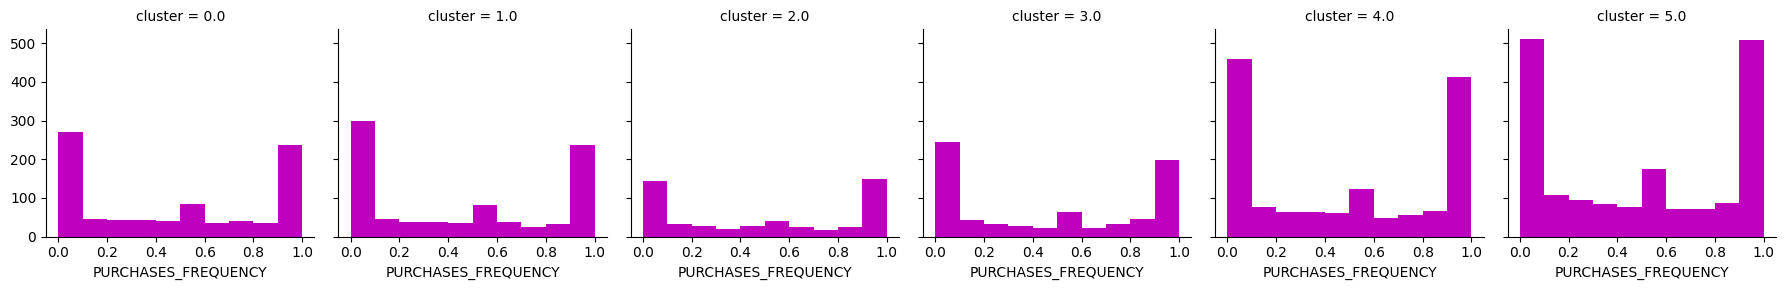

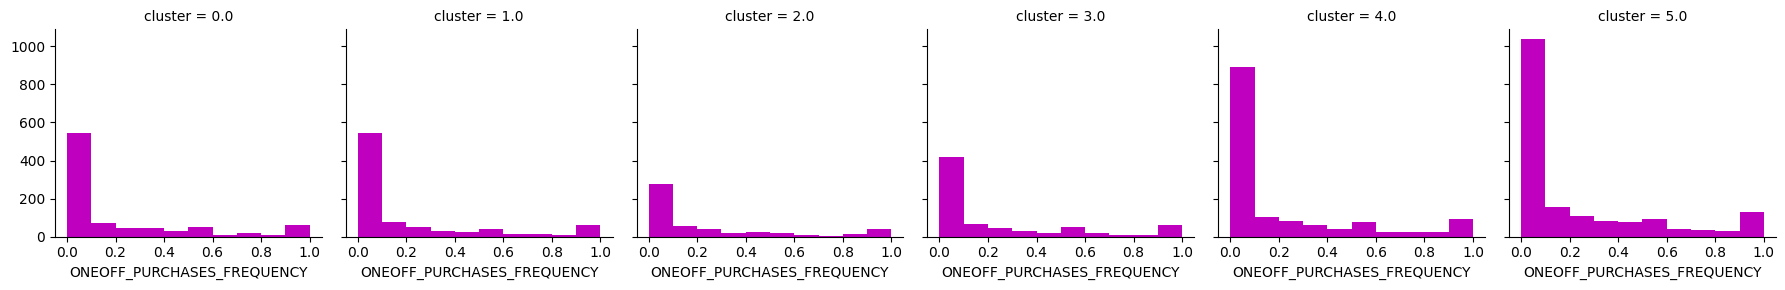

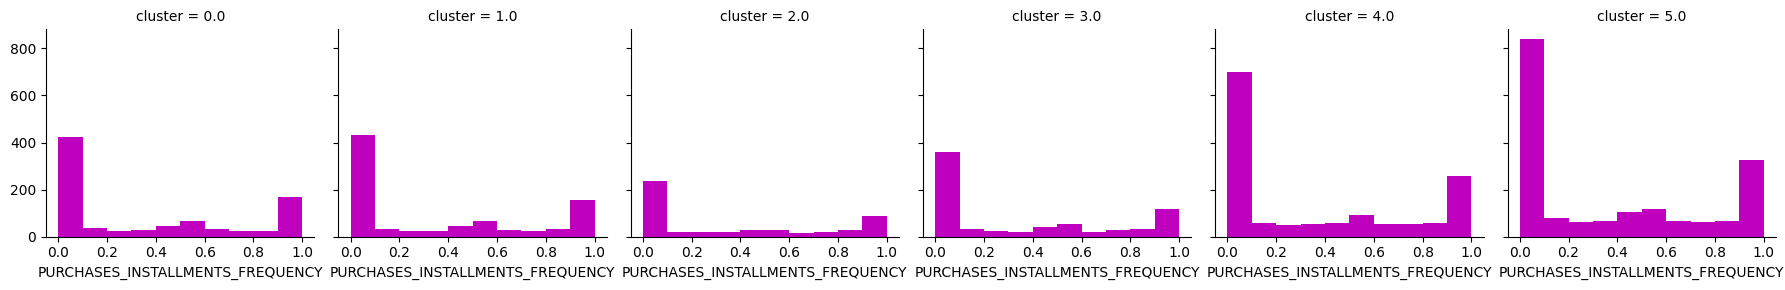

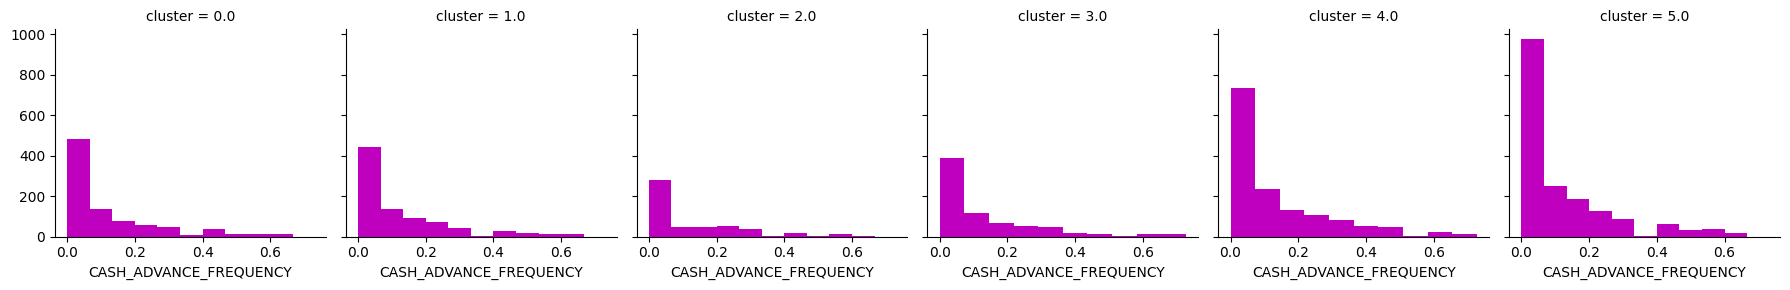

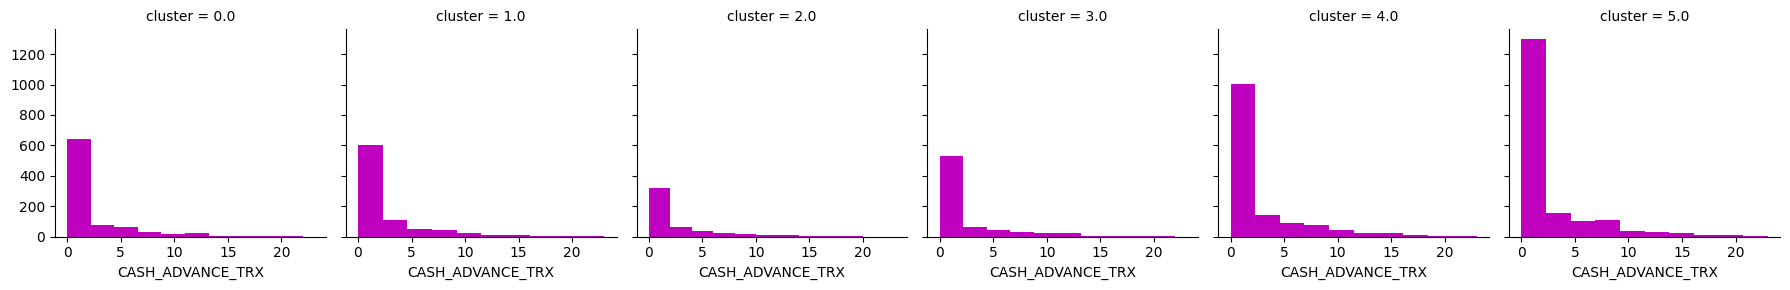

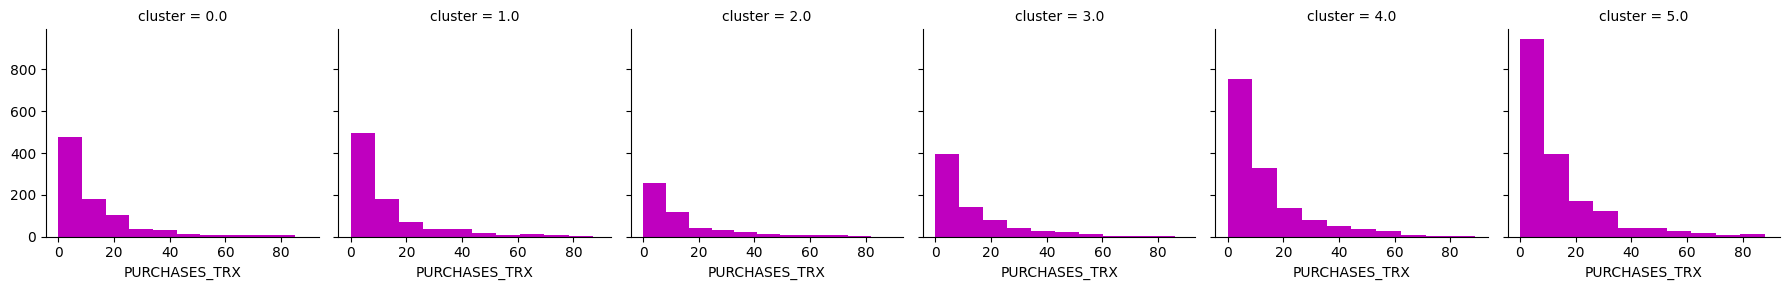

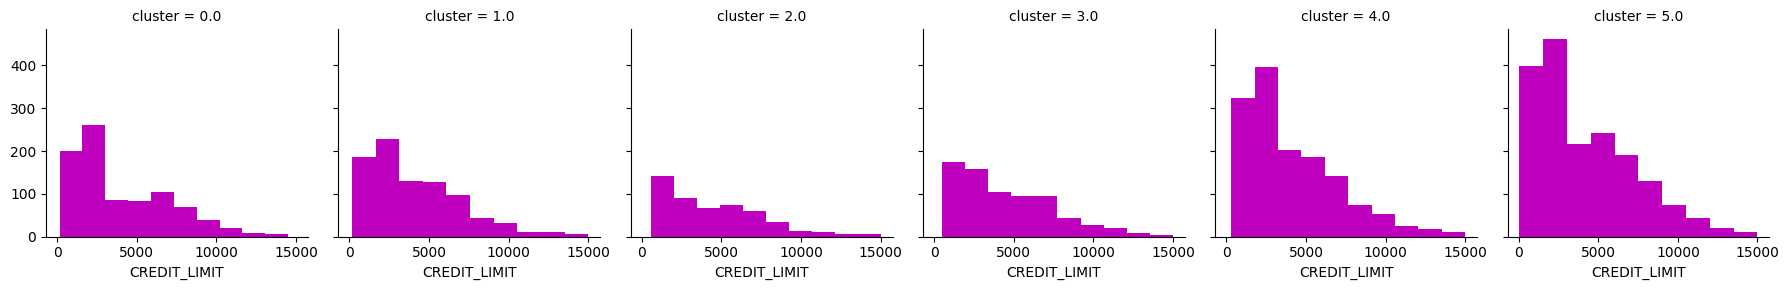

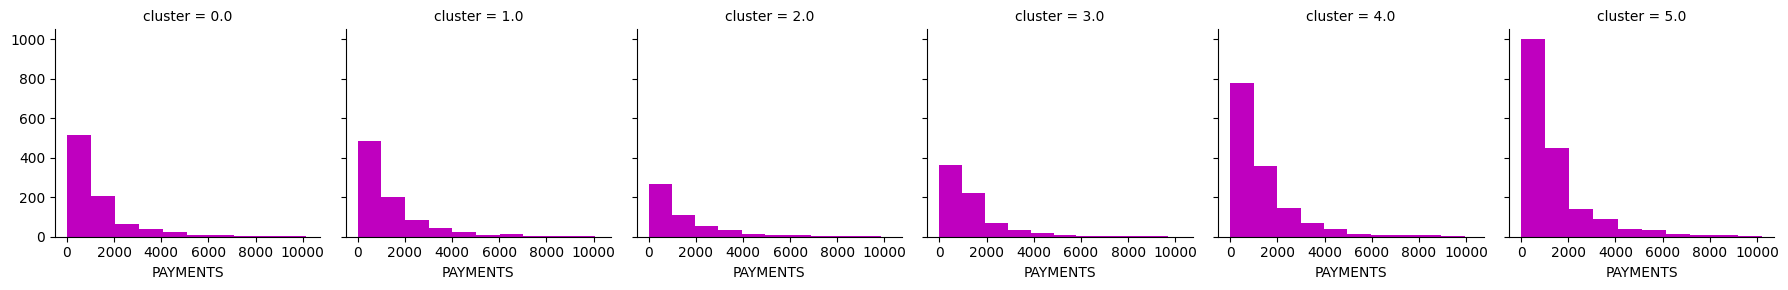

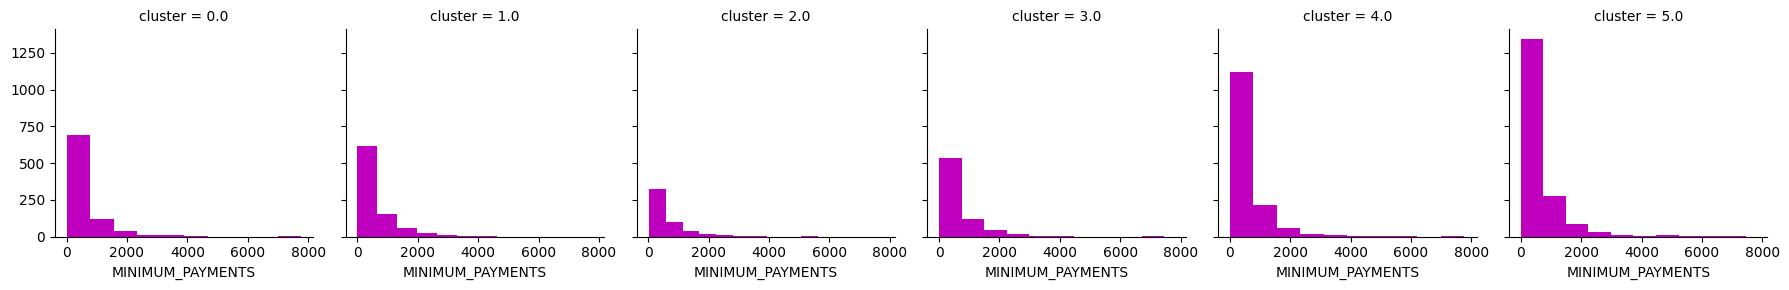

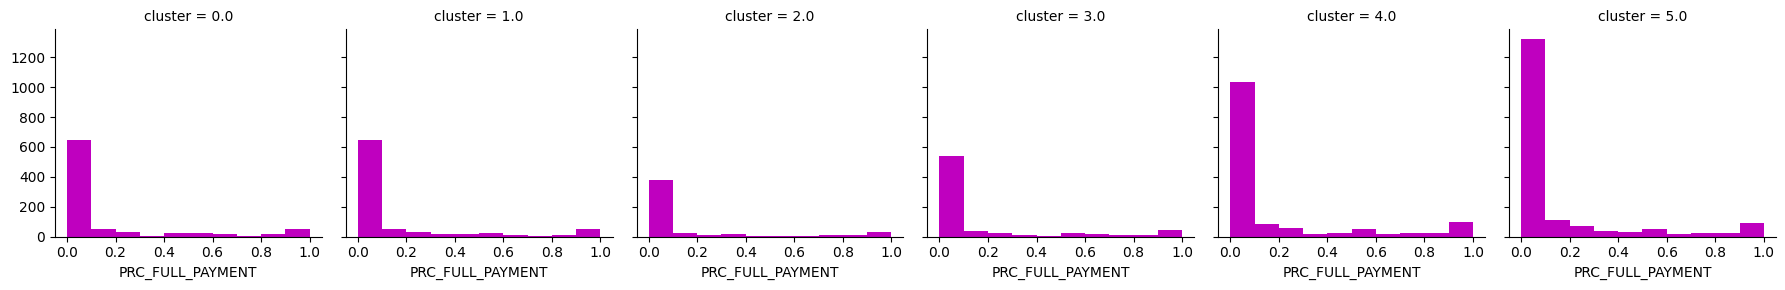

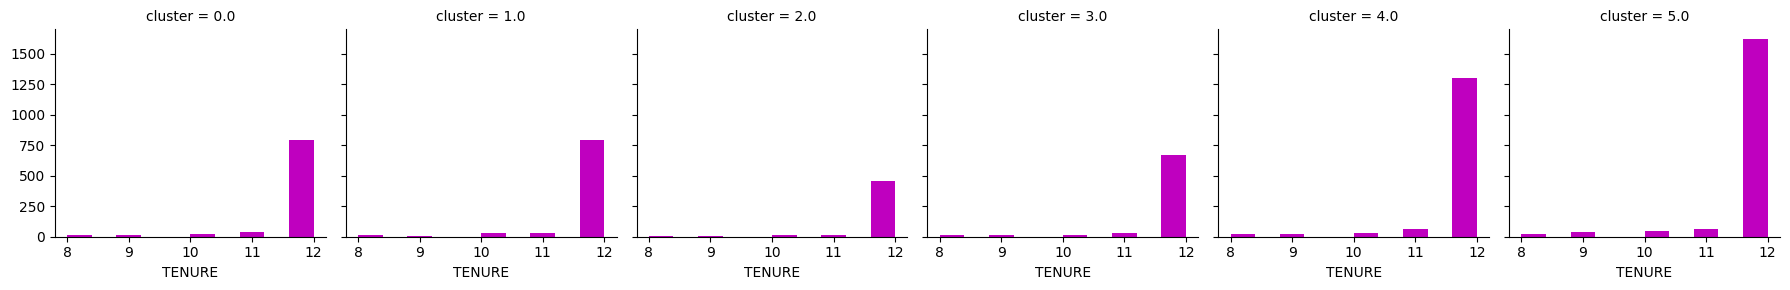

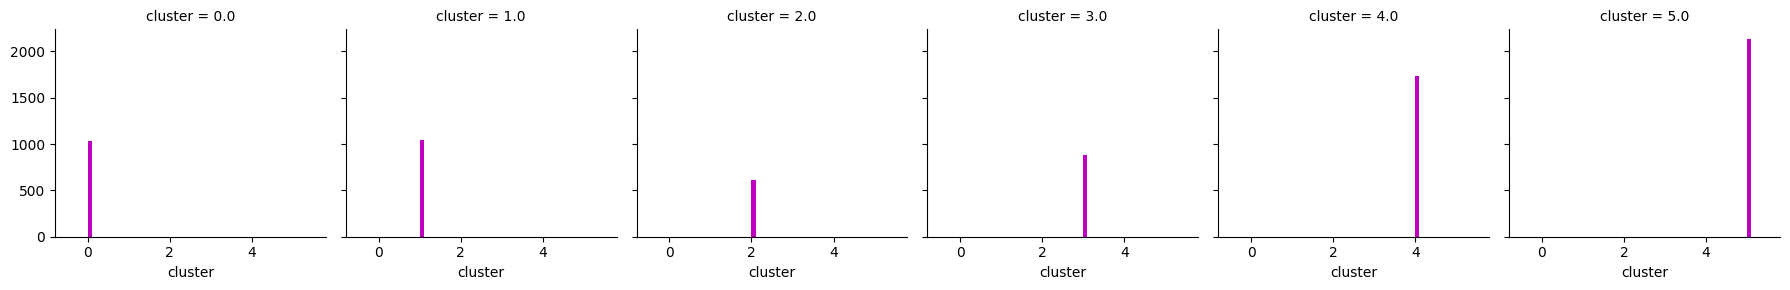

In [35]:
# Visualizing the distribution of features
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c, color="m")

<b>Silhouette Score Analysis</b>

Our Inertia method about indicates that 6 as the optimal number of clusters. However, let us also use Silhouette scores to decide the number of clusters to be formulated from the data.

Silhouette Coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Finding the Silhouette score
for x in range(2, 7):
    model = KMeans(n_clusters = x, random_state=42)
    label = model.fit_predict(X)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_scaled, label))

Silhouette-Score for 2 Clusters:  0.20567938344541828
Silhouette-Score for 3 Clusters:  0.20692901356937662
Silhouette-Score for 4 Clusters:  0.1839895941952107
Silhouette-Score for 5 Clusters:  0.18413585606640648
Silhouette-Score for 6 Clusters:  0.1907544962382555


According to our analysis we have higher silhouette scores in 2 and 3 clusters. Let us now apply PCA to improve our clustering.

## Feature Extraction through PCA

Principal Component Analysis(PCA) is a technique used to transform a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components. This would help us reduce dimensionalities, extract features, and improve our clusters.

I chose to first apply PCA for 2 componenets to see if this help us reduce noise in our clustering models.

In [37]:
from sklearn.decomposition import PCA

# apply PCA for two components
pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['P1', 'P2']) 
principalDf.head(2)

,P1,P2
0,-1.330770,-2.040060
1,-2.776073,3.320219


Let's now check the performance of our PCA componenents on 2 clusters.

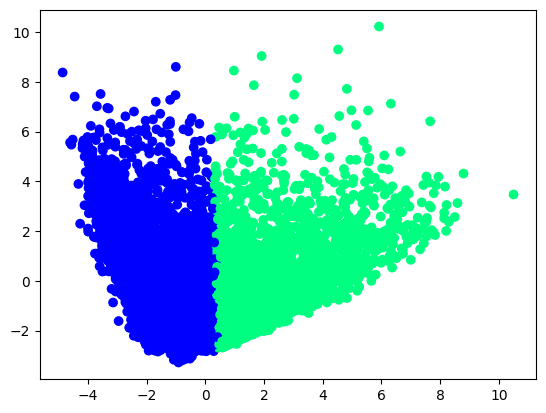

In [38]:
# Applying PCA to 2 clusters

kmeans = KMeans(n_clusters=2)
kmeans.fit(principalDf)

# Visualizing the clustering 
plt.scatter(principalDf['P1'], principalDf['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(principalDf), cmap =plt.cm.winter) 
plt.show() 

According to our inertia plot the optimal number of clusters lie in 5 to 6 range. Therefore, let us confirm our cluster performance for 5 and 6 clusters.

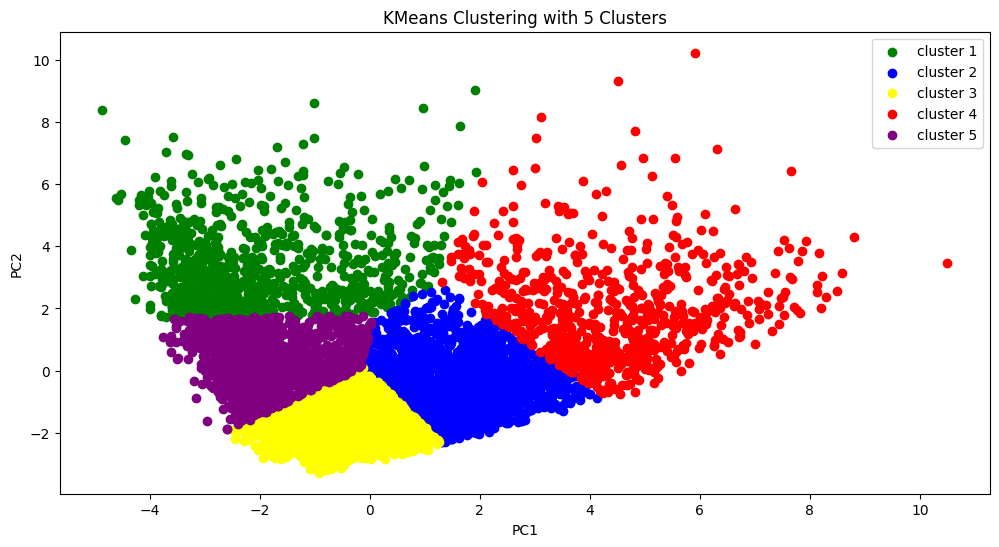

In [39]:
df1 = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
pred = pd.Series(KMeans(n_clusters = 5,).fit_predict(df1))
df1 = pd.concat([df1, pred], axis =1)
df1.columns = [0, 1,'outcome'] 

fig = plt.figure(figsize = (12, 6))
colors = ['green', 'blue', 'yellow', 'red', 'purple', 'brown'] 

plt.scatter(df1[df1['outcome']==0].iloc[:,0], df1[df1.outcome==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df1[df1['outcome']==1].iloc[:,0], df1[df1.outcome==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df1[df1['outcome']==2].iloc[:,0], df1[df1.outcome==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df1[df1['outcome']==3].iloc[:,0], df1[df1.outcome==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df1[df1['outcome']==4].iloc[:,0], df1[df1.outcome==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend() 
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

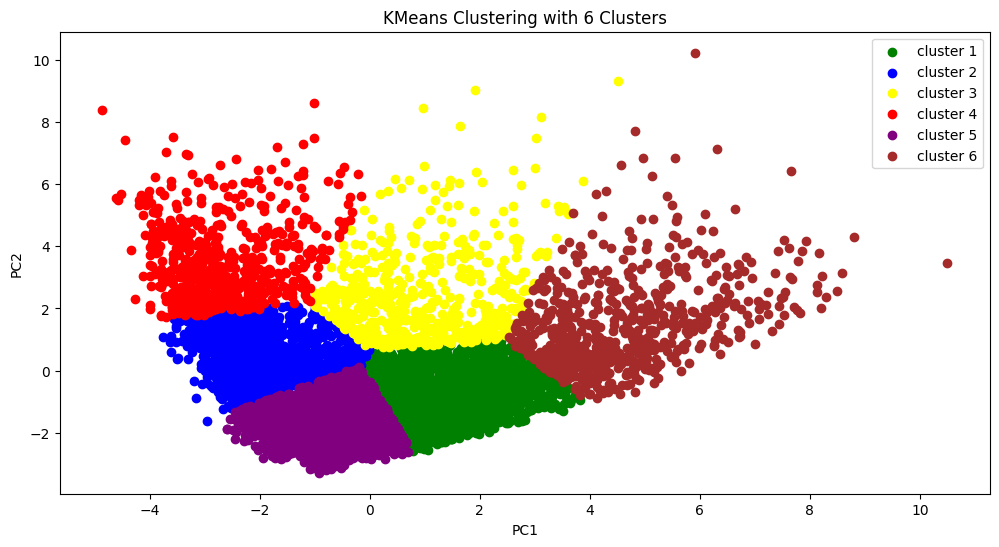

In [40]:
df1 = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
pred = pd.Series(KMeans(n_clusters = 6,).fit_predict(df1))
df1 = pd.concat([df1, pred], axis =1)
df1.columns = [0, 1,'outcome'] 

fig = plt.figure(figsize = (12, 6))
colors = ['green', 'blue', 'yellow', 'red', 'purple', 'brown'] 

plt.scatter(df1[df1['outcome']==0].iloc[:,0], df1[df1.outcome==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df1[df1['outcome']==1].iloc[:,0], df1[df1.outcome==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df1[df1['outcome']==2].iloc[:,0], df1[df1.outcome==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df1[df1['outcome']==3].iloc[:,0], df1[df1.outcome==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df1[df1['outcome']==4].iloc[:,0], df1[df1.outcome==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(df1[df1['outcome']==5].iloc[:,0], df1[df1.outcome==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend() 
plt.title('KMeans Clustering with 6 Clusters') 
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show() 

In [41]:
# Performance Evaluation:

from sklearn.metrics import silhouette_samples, silhouette_score

# Finding the Silhouette score
for x in range(2, 7):
    model = KMeans(n_clusters = x, random_state=42)
    label = model.fit_predict(X) 
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(df1, label))

Silhouette-Score for 2 Clusters:  0.33002051391480985
Silhouette-Score for 3 Clusters:  0.3079914738069033
Silhouette-Score for 4 Clusters:  0.28612029241085946
Silhouette-Score for 5 Clusters:  0.19915328176905184
Silhouette-Score for 6 Clusters:  0.1532341441310897


There are significant improvements in our silhouette scores for the K-means models. I used Silhouette score as a metric to evaluate the clusters. Silhouette scores indicate the similarity of clusters. Accordingly, we see a significant improvement in Silhouette scores of clusters after applying PCA.

Let us now test the impact of PCA on other clustering models:

## Gausian Mixture Clustering

Gausian Mixture model assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. It can be used for clustering as they provide a framework for assessing the partitions of the data by considering that each component represents a cluster.

Text(0, 0.5, 'PC2')

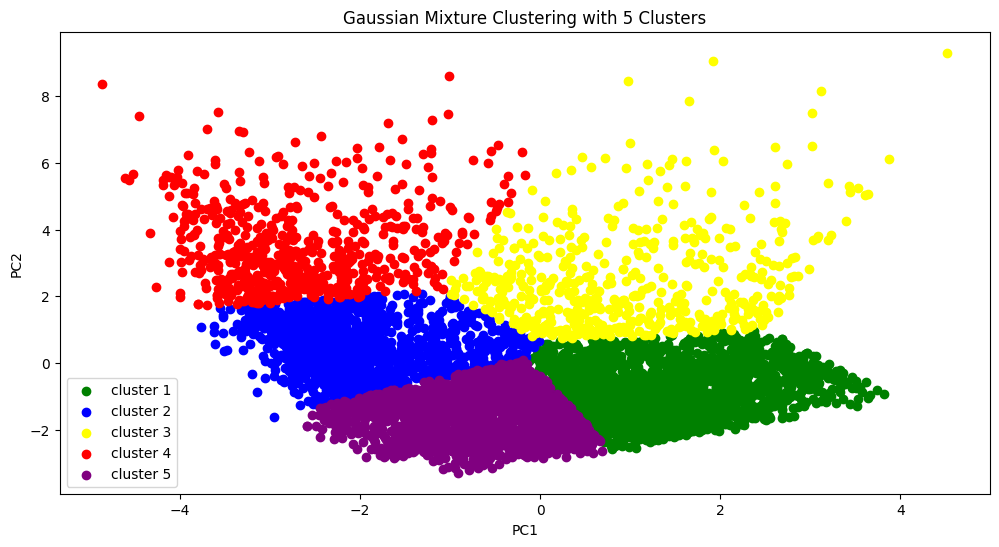

In [42]:
from sklearn.mixture import GaussianMixture

df2 = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
pred = pd.Series(GaussianMixture(n_components = 5,).fit_predict(df2))
df2 = pd.concat([df2, pred], axis =1)
df2.columns = [0,1,'outcome']

fig = plt.figure(figsize = (12, 6))
colors = ['green', 'blue', 'yellow', 'red', 'purple', 'brown'] 

plt.scatter(df1[df1['outcome']==0].iloc[:,0], df1[df1.outcome==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df1[df1['outcome']==1].iloc[:,0], df1[df1.outcome==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df1[df1['outcome']==2].iloc[:,0], df1[df1.outcome==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df1[df1['outcome']==3].iloc[:,0], df1[df1.outcome==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df1[df1['outcome']==4].iloc[:,0], df1[df1.outcome==4].iloc[:,1], c = colors[4], label = 'cluster 5')

plt.legend() 
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

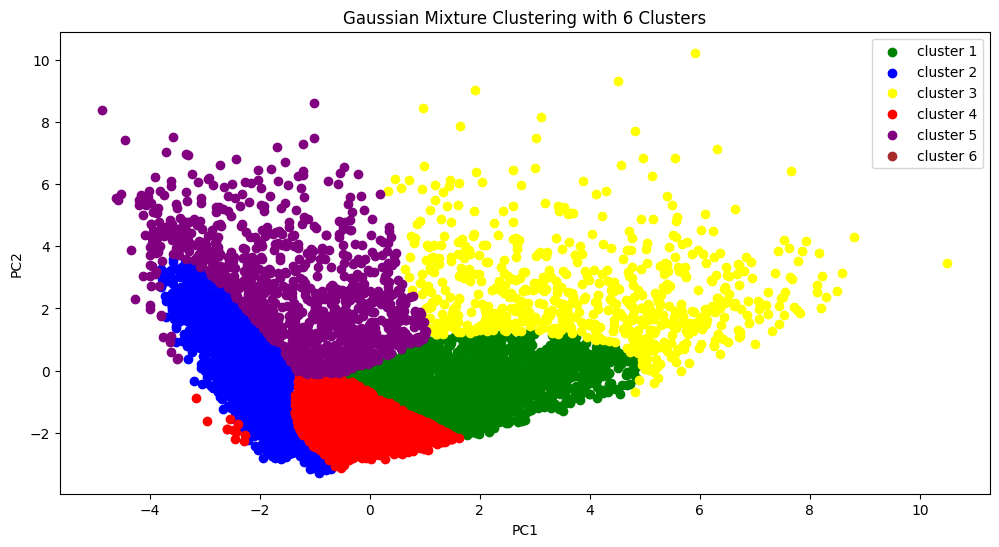

In [43]:
df2 = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
pred = pd.Series(GaussianMixture(n_components = 5,).fit_predict(df2))
df2 = pd.concat([df2, pred], axis =1)
df2.columns = [0,1,'outcome']

fig = plt.figure(figsize = (12, 6))
colors = ['green', 'blue', 'yellow', 'red', 'purple', 'brown'] 

plt.scatter(df2[df2['outcome']==0].iloc[:,0], df2[df2.outcome==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df2[df2['outcome']==1].iloc[:,0], df2[df2.outcome==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df2[df2['outcome']==2].iloc[:,0], df2[df2.outcome==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df2[df2['outcome']==3].iloc[:,0], df2[df2.outcome==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df2[df2['outcome']==4].iloc[:,0], df2[df2.outcome==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(df2[df2['outcome']==5].iloc[:,0], df2[df2.outcome==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend() 
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [47]:
# Performance Evaluation:

from sklearn.metrics import silhouette_samples, silhouette_score

# Finding the Silhouette score
silhouette_scores = [] 

# Evaluating the performance 
s_scores.append(silhouette_score(df2, labels)) 
  
print(s_scores)

[0.12019725990020473, 0.12019725990020473]


## Spectral Clustering

Spectral Clustering algorithm treats the data points as nodes of a graph and quantifies the similarity matrix of n x n dimensions, where n indicates the number of data points in the dataset.

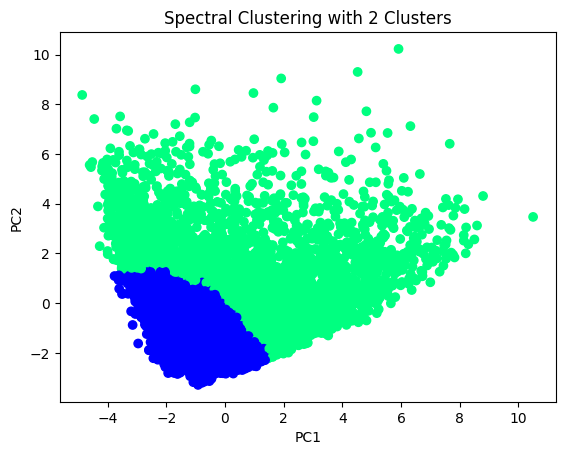

In [48]:
# Building the clustering model 
spectral_model = SpectralClustering(n_clusters = 2, affinity= 'nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels = spectral_model.fit_predict(principalDf)

# Visualizing the clustering 
plt.scatter(principalDf['P1'], principalDf['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity= 'nearest_neighbors').fit_predict(principalDf), cmap =plt.cm.winter) 

plt.title('Spectral Clustering with 2 Clusters') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

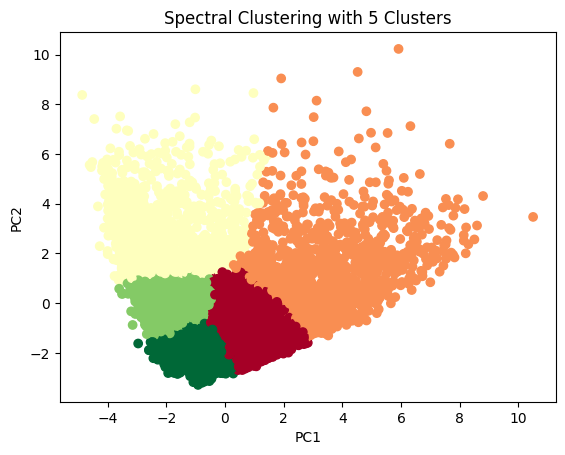

In [49]:
# Building the clustering model with 5 clusters

spectral_model5 = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_5 = spectral_model5.fit_predict(principalDf)

# Visualizing the clustering 
plt.scatter(principalDf['P1'], principalDf['P2'],  
           c = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors').fit_predict(principalDf), cmap=plt.cm.RdYlGn) 

plt.title('Spectral Clustering with 5 Clusters') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

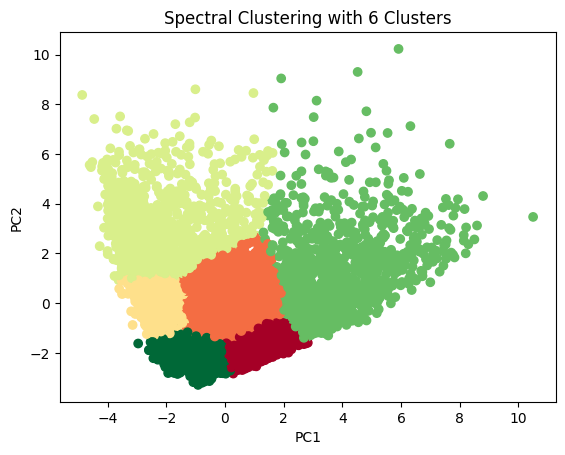

In [50]:
# Building the clustering model with 6 clusters

spectral_model6 = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_6 = spectral_model6.fit_predict(principalDf)

# Visualizing the clustering 
plt.scatter(principalDf['P1'], principalDf['P2'],  
           c = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors').fit_predict(principalDf), cmap=plt.cm.RdYlGn) 

plt.title('Spectral Clustering with 6 Clusters') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

Let's estimate the quality of our clusters through silhouette scores.

In [51]:
# List of different values of affinity 
affinity = ['nearest-neighbors'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(principalDf, labels)) 
  
print(s_scores)

[0.30503727558749344]


## Evaluation

The evaluation metric I used in the analysis is the silhouette scores. I chose the Silhouette Score as a metric as it indicates the similarity of clusters. Applying PCA to our models has significantly improved our silhouette scores. The K-means clustering model performs better(0.322) overall. It appears that our two-cluster solution reliably produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters.

## Possible Marketing Strategy

Since we picked the K-means Clustering model as the optimal model for customer segmentation, I chose to visualize the features of the algorithm by constructiing pairplots. The pairplots depict the joint relationships for univariate distributions. I believe that this would provide us meaningful insights on each customer group and what the company needs to target.

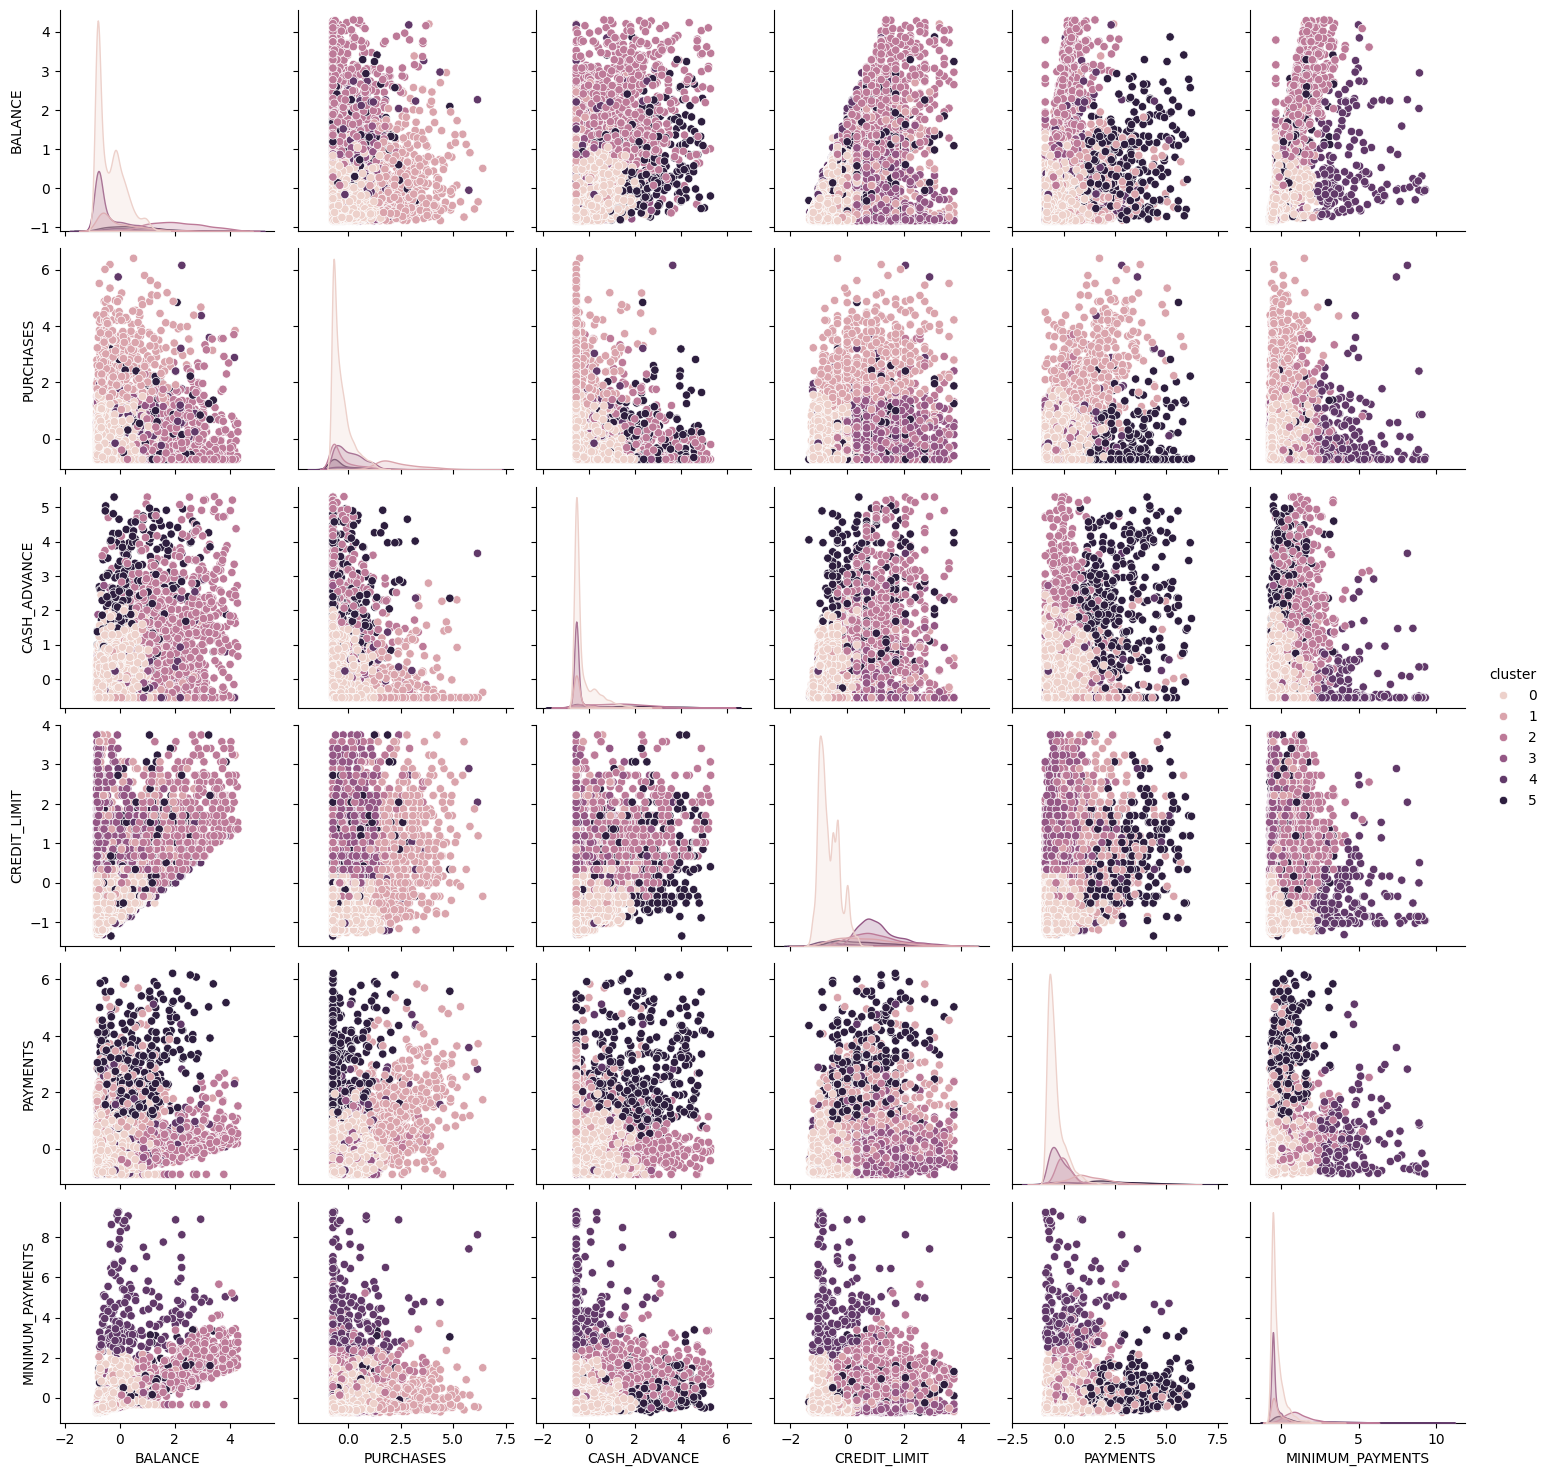

In [52]:
# Using Seaborn's pairplot to discover features

# creating a 'features' variable
features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# Creating a new dataframe with features
data2 = pd.DataFrame(data_scaled[features])

# apply KMeans clustering
model = KMeans(n_clusters = 6)
label = model.fit_predict(data2)

# creating 'cluster' column
data2['cluster'] = label
features.append('cluster')

# visualizing through Seaborn pairplot
sns.pairplot(data2[features], hue='cluster')

The company can use the above clustering data to segment the customers according to their purchase patterns. I chose the above features to visualize the credit card customers purchasing patterns. The correlations above depict how one feature correlates toward another.

- `Cluster 0: "The Average Person"` - This cluster represents users who have relatively conservative financial habits, with lower purchases, payments, and credit limits. For these users, the focus could be on budgeting techniques, saving strategies, and gradually building financial literacy. Personalized recommendations could include tips on budget optimization, setting achievable financial goals, and establishing emergency funds.
- `Cluster 1: "The Active Users"` - These users have average to high credit limits and are more engaged in making purchases. Recommendations for this cluster could involve optimizing rewards programs, managing credit utilization effectively, and exploring investment opportunities to maximize returns on their spending.
- `Cluster 2: "The Spenders"` - This cluster comprises users who make a significant number of purchases and have high balances, cash advances, and payments. Recommendations may include strategies for debt management, reducing unnecessary spending, and establishing a structured repayment plan to avoid accumulating high-interest debt.
- `Cluster 3: "The Borrowers"` - Users in this cluster have average to high credit limits and tend to take more cash advances. Recommendations could focus on educating users about the potential risks of cash advances, managing debt responsibly, and exploring alternatives to borrowing, such as building emergency savings or seeking financial counseling.
- `Cluster 4: "The High Risk Takers"` - These users have high minimum payments but low credit limits, indicating a potentially precarious financial situation. Recommendations may include strategies for risk mitigation, such as building credit responsibly, avoiding high-cost debt, and exploring financial products tailored to their credit profile.
- `Cluster 5: "The Unpredictables"` - This cluster represents users with average to high credit limits who do not make much use of their credit cards. While it may be challenging to determine their spending patterns, recommendations could focus on encouraging responsible credit utilization, exploring financial products that align with their financial goals, and providing educational resources to increase financial literacy.

## Conclusion
We approached the customer segmentation problem by analyzing the credit card data set. I gained insights into the dataset through exploring the data, preprocessing, and extracting relevant features to build our clusters. I used the K-means clustering to identify the inertia and silhouette scores. I used the inertia plot and silhouette scores to evaluate the clusters. Next, I used PCA to improve the clustering.

Clustering models such as K-means Clustering, Gaussian Mixture, and Spectral Clustering were then built to determine performance of the different models. I chose Silhouette score as a metric to decide the similarity between clusters for each model. The K-Means clustering algorithms proves to be the most efficient (0.322) in our analysis as it captured the most relevant customer grouping criterias.

Utilizing K-means clustering is strongly advised for segmenting users of our personal budgeting and accounting platform. The correlations observed between various financial features suggest distinct groups of users with specific financial behaviors and needs. For instance, identifying clusters such as "The Big Spenders" could enable our platform to offer targeted recommendations during periods of reduced sales, thereby assisting users in optimizing their spending habits and potentially increasing their savings over time. (AKA Prime Day)

## Future Work

- Use a different set of features and analyze the performance of the k-means algorithm.
- Apply other clustering techniques to evaluate the results.